<a href="https://colab.research.google.com/github/salmanromeo/MAE_3403_Computer_Methods_in_Analysis_and_Design/blob/main/HW_Sol_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework # 8**

**Problem 1**

The concentration of a certain toxin in a system of lakes downwind of an industrial area has been monitored very accurately at intervals from 1993 to 2007 as shown in the table below. It is believed that the concentration has varied smoothly between these data points.
```markdown
Year  | Toxin Concentration 
------|------------------
1993  | 12.0
1995  | 12.7
1997  | 13.0 
1999  | 15.2
2001  | 18.2 
2003  | 19.8
2005  | 24.1 
2007  | 28.1 
```


**A. Interpolate the data with the cubic spline interpolation. Plot the cubic spline polynomial and the data points. Use the polynomial to predict the condition of the lakes in 2006. Discuss this prediction.**

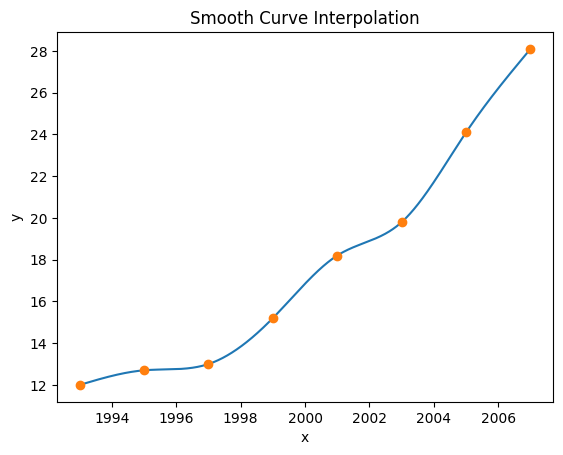

The interpolated value of y at x=2006 is 26.223


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def plot_smooth_curve(xi, yi):
    x = np.linspace(xi[0], xi[-1], 1000)
    cs = CubicSpline(xi, yi, bc_type='natural')
    plt.plot(x, cs(x), label='Interpolated curve')
    plt.plot(xi, yi, 'o', label='Input data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Smooth Curve Interpolation')
    plt.show()

# Test the code
xi = np.array([1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007])
yi = np.array([12.0, 12.7, 13.0, 15.2, 18.2, 19.8, 24.1, 28.1])
plot_smooth_curve(xi, yi)

# Call the interpolate function with xi, yi, and n=1000
cs = CubicSpline(xi, yi, bc_type='natural')
x_interp = np.linspace(xi[0], xi[-1], 1000)
y_interp = cs(x_interp)

# Find the index of the x_interp array closest to 2006
index = np.abs(x_interp - 2006).argmin()

# Print the interpolated value of y at 2006
print(f"The interpolated value of y at x=2006 is {y_interp[index]:.3f}")

**B. Interpolation may also be used to fill “holes” in the data. Say the data from 1997 and 1999 disappeared. Predict these values using the cubic spline interpolation fitted through the other known data points.**

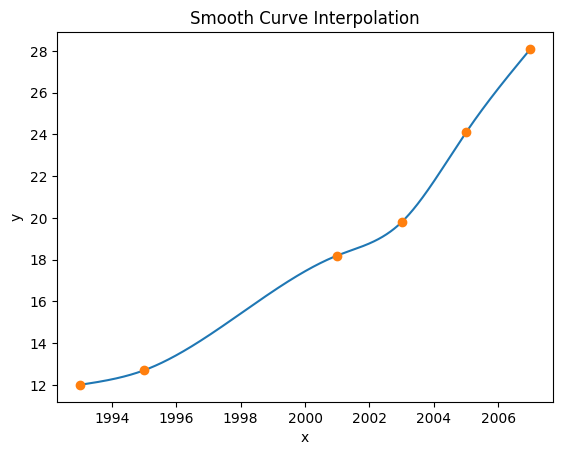

The interpolated value of y at x=1997 is 14.355
The interpolated value of y at x=1999 is 16.481


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def plot_smooth_curve(xi, yi):
    x = np.linspace(xi[0], xi[-1], 1000)
    cs = CubicSpline(xi, yi, bc_type='natural')
    plt.plot(x, cs(x), label='Interpolated curve')
    plt.plot(xi, yi, 'o', label='Input data')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Smooth Curve Interpolation')
    plt.show()

# Test the code
xi = np.array([1993, 1995, 2001, 2003, 2005, 2007])
yi = np.array([12.0, 12.7, 18.2, 19.8, 24.1, 28.1])
plot_smooth_curve(xi, yi)

# Call the interpolate function with xi, yi, and n=1000
cs = CubicSpline(xi, yi, bc_type='natural')
x_interp = np.linspace(xi[0], xi[-1], 1000)
y_interp = cs(x_interp)

# Find the index of the x_interp array closest to 1997 and 1999
index_1997 = np.abs(x_interp - 1997).argmin()
index_1999 = np.abs(x_interp - 1999).argmin()

# Print the interpolated value of y at 2006
print(f"The interpolated value of y at x=1997 is {y_interp[index_1997]:.3f}")
print(f"The interpolated value of y at x=1999 is {y_interp[index_1999]:.3f}")

**C. Repeat (b) with the “sklearn” Gaussian Process regression method. Compare and discuss your results.**

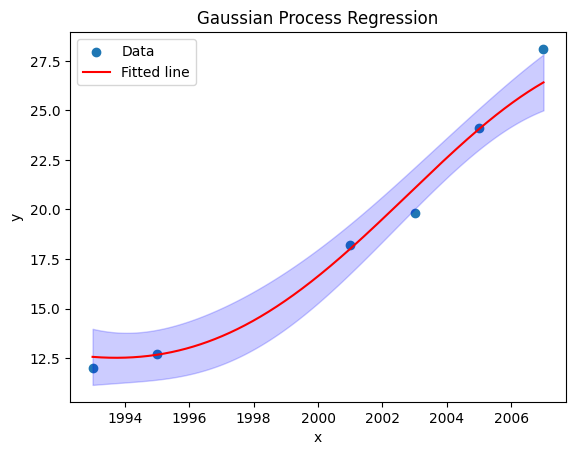

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Generate data
xi = np.array([1993, 1995, 2001, 2003, 2005, 2007])
yi = np.array([12.0, 12.7, 18.2, 19.8, 24.1, 28.1])

# Define the kernel function
kernel = RBF(length_scale=1.0)     # controls the smoothness of the function

# Create the Gaussian Process Regression object
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, normalize_y=True)  # helps to regularize the model and prevent overfitting

# Fit the model to the data
x = xi.reshape(-1, 1)
gp.fit(x, yi)

# Generate new data to make predictions
x_new = np.linspace(xi[0], xi[-1], 1000).reshape(-1, 1)

# Make predictions with the model
y_pred, std = gp.predict(x_new, return_std=True)

# Plot the data and the fitted curve with uncertainty bounds
plt.scatter(xi, yi, label='Data')
plt.plot(x_new, y_pred, color='red', label='Fitted line')
plt.fill_between(x_new.squeeze(), y_pred - std, y_pred + std, alpha=0.2, color='blue')
plt.title('Gaussian Process Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The interpolated value of y at x=1997 is: 15.420287171111681
The interpolated value of y at x=1999 is: 17.582479093281677


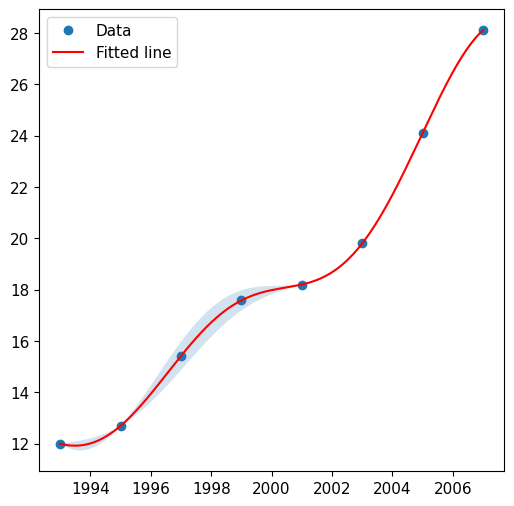

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Data (with missing values)
xi = np.array([1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007])
yi = np.array([12.0, 12.7, np.nan, np.nan, 18.2, 19.8, 24.1, 28.1])

# Remove missing values
remove = np.isnan(yi)
X = xi[~remove].reshape(-1, 1)
y = yi[~remove]

# Define kernel
kernel = C(1.0, (1e-4, 1e4)) * RBF(10, (1e-4, 1e4))

# Create Gaussian Process regression model
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit model to data
gp_model.fit(X, y)

# Predict missing values
X_pred = xi[remove].reshape(-1, 1)
y_pred, sigma = gp_model.predict(X_pred, return_std=True)
yi[remove] = y_pred

# Print predicted values
print("The interpolated value of y at x=1997 is:", y_pred[0])
print("The interpolated value of y at x=1999 is:", y_pred[1])

# Plot data points and Gaussian Process regression model
x = np.linspace(xi[0], xi[-1], 1000).reshape(-1, 1)
y_pred, sigma = gp_model.predict(x, return_std=True)
plt.plot(xi, yi, 'o', label='Data')
plt.plot(x, y_pred, color='red', label='Fitted line')
plt.fill_between(x.ravel(), y_pred-sigma, y_pred+sigma, alpha=0.2)
plt.legend()
plt.show()

**Problem 2**

#####Write a Python program to solve unsteady heat equation.
\begin{align}
  \frac {\partial u}{\partial t} = α \frac {\partial^2 u}{\partial x^2} 
    \end{align}
for $x ∈ [−1, 1]$ and $α = 1/π^2$ using initial condition $u(t = 0, x) = − sin(πx)$ and boundary conditions $u(t, x = −1) = 0, u(t, x = 1) = 0$.
#####Run your programs within the time interval $t ∈ [0, 1])$ using the following numerical parameters.

**A. Forward Time Central Space (FTCS) scheme (explicit)**

**Case 1: $Δt = 0.01$ and $Δx = 0.025$**

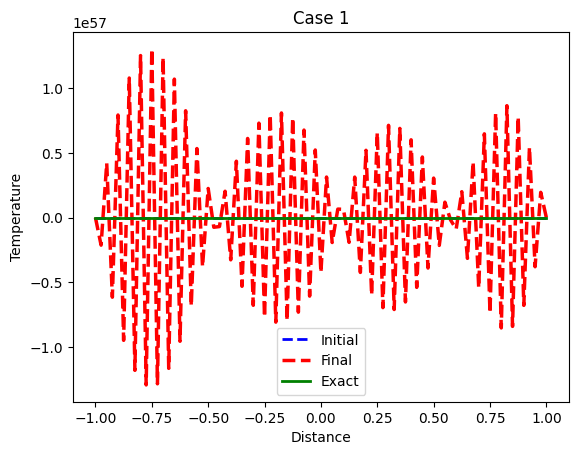

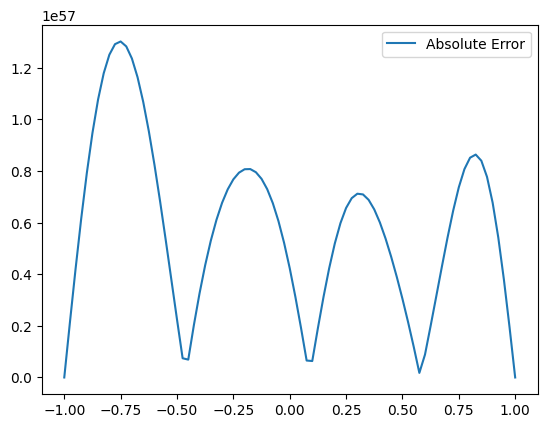

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set numerical parameters
dt = 0.01
dx = 0.025
t_final = 1.0

# Set physical parameters
alpha = 1 / np.pi**2

# Set up grid
x = np.arange(-1, 1+dx, dx)
t = np.arange(0, t_final+dt, dt)
n = len(x)
m = len(t)

# Initialize solution matrix
u = np.zeros((m, n))

# Set initial condition
u[0,:] = -np.sin(np.pi*x)

# Set boundary conditions
u[:,0] = 0
u[:,-1] = 0

# Apply FTCS scheme
for j in range(1, m):
    for i in range(1, n-1):
        u[j,i] = u[j-1,i] + alpha*dt/dx**2 * (u[j-1,i+1] - 2*u[j-1,i] + u[j-1,i-1])

# Define the exact solution
u_exact = -np.sin(np.pi * x) * np.exp(-t_final)

# Plot the results
plt.figure()
plt.plot(x, u[0,:], '--b', label='Initial', linewidth=2)
plt.plot(x, u[-1,:], '--r', label='Final', linewidth=2.5)
plt.plot(x, u_exact, 'g', label='Exact', linewidth=2)
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Case 1')
plt.legend()
plt.show()

plt.figure()
plt.plot(x, np.abs(u_exact - u[-1,:]), label='Absolute Error')
plt.legend()
plt.show()

**Case 2: $Δt = 0.0025$ and $Δx = 0.025$**

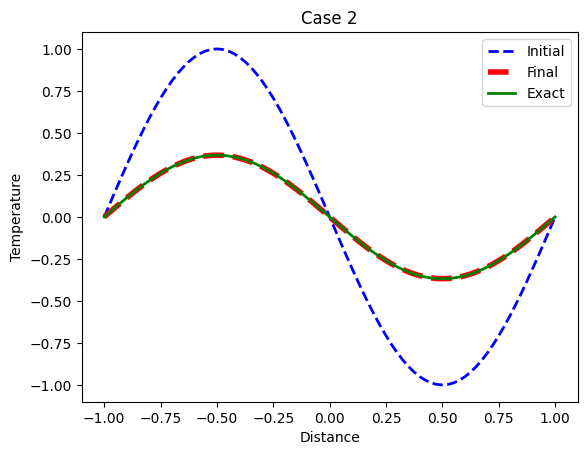

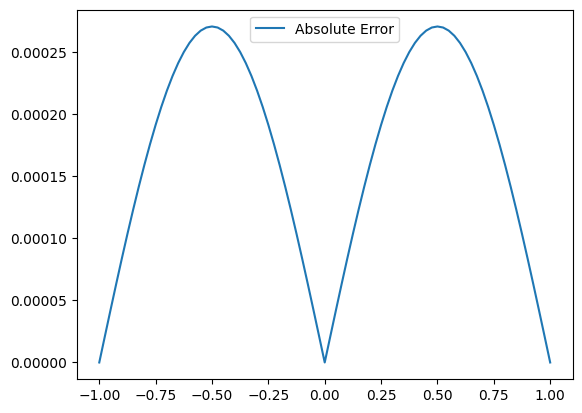

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set numerical parameters
dt = 0.0025
dx = 0.025
t_final = 1.0

# Set physical parameters
alpha = 1 / np.pi**2

# Set up grid
x = np.arange(-1, 1+dx, dx)
t = np.arange(0, t_final+dt, dt)
n = len(x)
m = len(t)

# Initialize solution matrix
u = np.zeros((m, n))

# Set initial condition
u[0,:] = -np.sin(np.pi*x)

# Set boundary conditions
u[:,0] = 0
u[:,-1] = 0

# Apply FTCS scheme
for j in range(1, m):
    for i in range(1, n-1):
        u[j,i] = u[j-1,i] + alpha*dt/dx**2 * (u[j-1,i+1] - 2*u[j-1,i] + u[j-1,i-1])

# Define the exact solution
u_exact = -np.sin(np.pi * x) * np.exp(-t_final)

# Plot the results
plt.figure()
plt.plot(x, u[0,:], '--b', label='Initial', linewidth=2)
plt.plot(x, u[-1,:], '--r', label='Final', linewidth=4)
plt.plot(x, u_exact, 'g', label='Exact', linewidth=2)
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Case 2')
plt.legend()
plt.show()

plt.figure()
plt.plot(x, np.abs(u_exact - u[-1,:]), label='Absolute Error')
plt.legend()
plt.show()

**Case 3: $Δt = 0.001$ and $Δx = 0.025$**

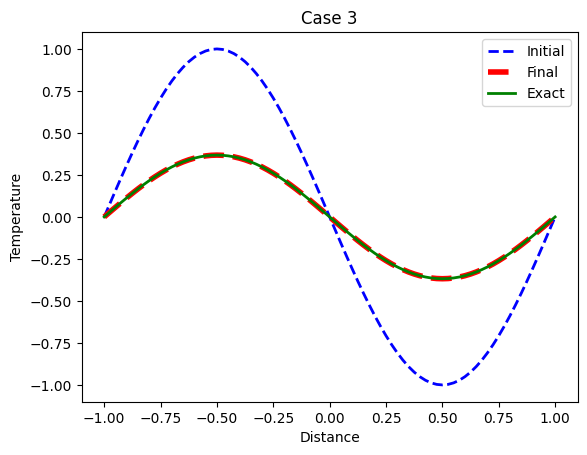

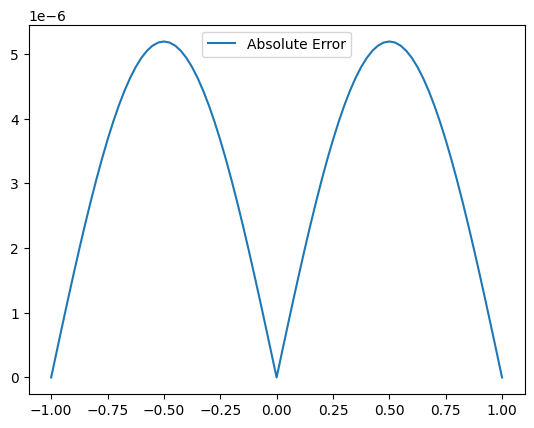

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set numerical parameters
dt = 0.001
dx = 0.025
t_final = 1.0

# Set physical parameters
alpha = 1 / np.pi**2

# Set up grid
x = np.arange(-1, 1+dx, dx)
t = np.arange(0, t_final+dt, dt)
n = len(x)
m = len(t)

# Initialize solution matrix
u = np.zeros((m, n))

# Set initial condition
u[0,:] = -np.sin(np.pi*x)

# Set boundary conditions
u[:,0] = 0
u[:,-1] = 0

# Apply FTCS scheme
for j in range(1, m):
    for i in range(1, n-1):
        u[j,i] = u[j-1,i] + alpha*dt/dx**2 * (u[j-1,i+1] - 2*u[j-1,i] + u[j-1,i-1])

# Define the exact solution
u_exact = -np.sin(np.pi * x) * np.exp(-t_final)

# Plot the results
plt.figure()
plt.plot(x, u[0,:], '--b', label='Initial', linewidth=2)
plt.plot(x, u[-1,:], '--r', label='Final', linewidth=4)
plt.plot(x, u_exact, 'g', label='Exact', linewidth=2)
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Case 3')
plt.legend()
plt.show()

plt.figure()
plt.plot(x, np.abs(u_exact - u[-1,:]), label='Absolute Error')
plt.legend()
plt.show()

**Note: Accuarcy increases or Absolute error decreases with the decrease of Δt for FTCS.**

**Similar FTCS code in Vector form**

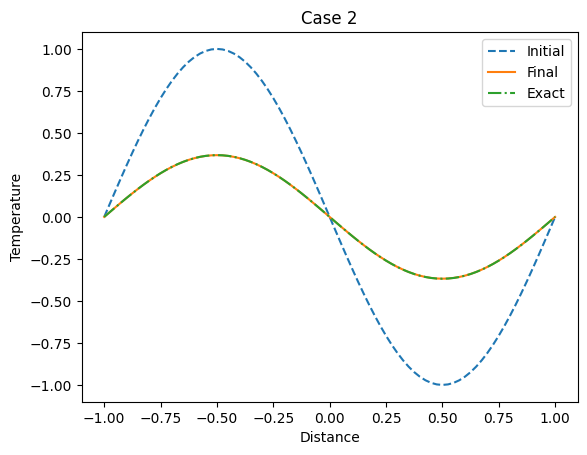

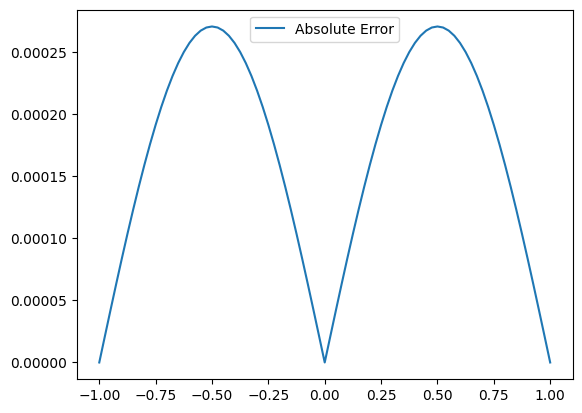

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constants and grid parameters
L = 2.0               # Length of the 1D domain      
dx = 0.025            # Grid spacing
N = int(L/dx) + 1     # Number of grid points
dt = 0.0025           # Time step
t_final = 1.0         # Final time
alpha = 1/(np.pi**2)  # Thermal diffusivity

# Initialize the temperature array
x = np.linspace(-L/2, L/2, N)
u = -np.sin(np.pi * x)

# Define the FTCS scheme
def ftcs(u, dt, dx, alpha, t_final):
    N = len(u)
    nt = int(t_final / dt) + 1
    u_new = u.copy()
    for n in range(1, nt):
        u_new[1:N-1] = u[1:N-1] + alpha * dt / dx**2 * (u[2:N] - 2*u[1:N-1] + u[0:N-2])
        u_new[0] = 0.0    # Left boundary condition
        u_new[N-1] = 0.0  # Right boundary condition
        u = u_new.copy()
    return u_new

# Solve the equation using the FTCS scheme
u_final = ftcs(u, dt, dx, alpha, t_final)

# Define the exact solution
u_exact = -np.sin(np.pi * x) * np.exp(-t_final)

# Plot the results
plt.plot(x, u, '--', label='Initial')
plt.plot(x, u_final, label='Final')
plt.plot(x, u_exact, '-.', label='Exact')
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Case 2')
plt.legend()
plt.show()

plt.plot(x, np.abs(u_exact - u_final), label='Absolute Error')
plt.legend()
plt.show()

**B. Scipy “odeint” and “numpy” fft (Fast Fourier Transform) packages**

**Case 1: $Δt = 0.01$ and $Δx = 0.025$**

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


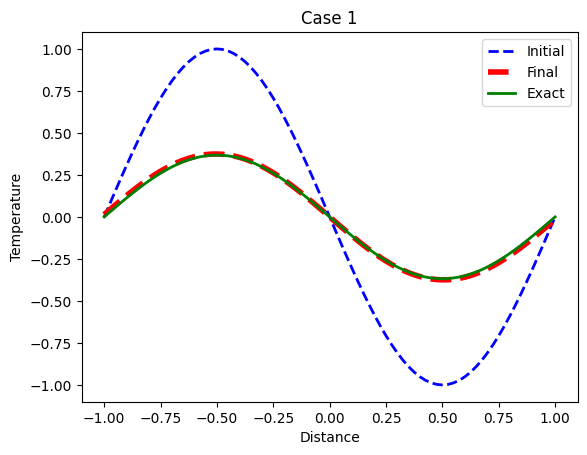

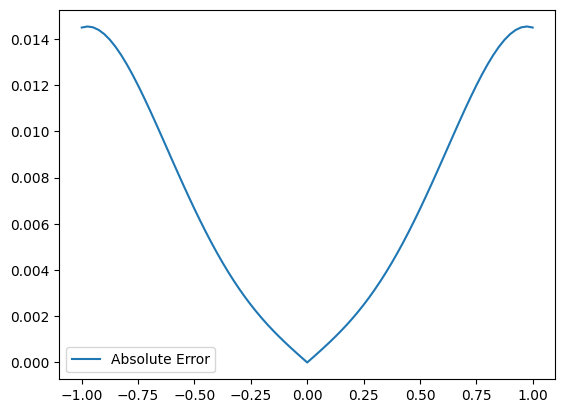

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Set numerical parameters
dt = 0.01
dx = 0.025
t_final = 1.0

# Set physical parameters
alpha = 1 / np.pi**2

# Set up grid
x = np.arange(-1, 1+dx, dx)
n = len(x)

# Define discrete wavenumbers
k = 2 * np.pi * np.fft.fftfreq(n, d=dx)

# Initial condition
u0 = -np.sin(np.pi * x)
u0hat = np.fft.fft(u0)

# Reshape u0hat to a real-imaginary vector
u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))

# Define the right-hand side function for odeint
def rhsHeat(uhat_ri, t, k, alpha):
    uhat = uhat_ri[:n] + 1j * uhat_ri[n:]
    d_uhat = -alpha * k**2 * uhat
    d_uhat_ri = np.concatenate((d_uhat.real, d_uhat.imag)).astype('float64')
    return d_uhat_ri

# Call odeint to solve the problem
t = np.arange(0, t_final+dt, dt)
uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(k, alpha))

# Reshape uhat_ri to a complex vector
uhat = uhat_ri[:,:n] + 1j * uhat_ri[:,n:]

# Compute the solution in physical space using FFT
u = np.zeros_like(uhat)
for i in range(len(u)):
    u[i,:] = np.fft.ifft(uhat[i,:]).real

# Define the exact solution
u_exact = -np.sin(np.pi * x) * np.exp(-t_final)

# Plot the results
plt.figure()
plt.plot(x, u[0,:], '--b', label='Initial', linewidth=2)
plt.plot(x, u[-1,:], '--r', label='Final', linewidth=4)
plt.plot(x, u_exact, 'g', label='Exact', linewidth=2)
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Case 1')
plt.legend()
plt.show()

plt.figure()
plt.plot(x, np.abs(u_exact - u[-1,:]), label='Absolute Error')
plt.legend()
plt.show()

**Case 2: $Δt = 0.0025$ and $Δx = 0.025$**

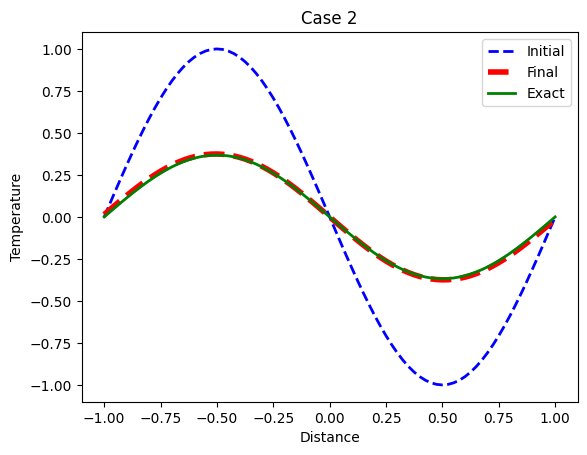

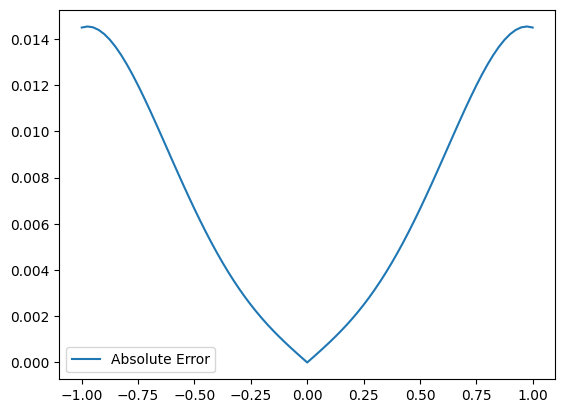

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Set numerical parameters
dt = 0.0025
dx = 0.025
t_final = 1.0

# Set physical parameters
alpha = 1 / np.pi**2

# Set up grid
x = np.arange(-1, 1+dx, dx)
n = len(x)

# Define discrete wavenumbers
k = 2 * np.pi * np.fft.fftfreq(n, d=dx)

# Initial condition
u0 = -np.sin(np.pi * x)
u0hat = np.fft.fft(u0)

# Reshape u0hat to a real-imaginary vector
u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))

# Define the right-hand side function for odeint
def rhsHeat(uhat_ri, t, k, alpha):
    uhat = uhat_ri[:n] + 1j * uhat_ri[n:]
    d_uhat = -alpha * k**2 * uhat
    d_uhat_ri = np.concatenate((d_uhat.real, d_uhat.imag)).astype('float64')
    return d_uhat_ri

# Call odeint to solve the problem
t = np.arange(0, t_final+dt, dt)
uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(k, alpha))

# Reshape uhat_ri to a complex vector
uhat = uhat_ri[:,:n] + 1j * uhat_ri[:,n:]

# Compute the solution in physical space using FFT
u = np.zeros_like(uhat)
for i in range(len(u)):
    u[i,:] = np.fft.ifft(uhat[i,:]).real

# Define the exact solution
u_exact = -np.sin(np.pi * x) * np.exp(-t_final)

# Plot the results
plt.figure()
plt.plot(x, u[0,:], '--b', label='Initial', linewidth=2)
plt.plot(x, u[-1,:], '--r', label='Final', linewidth=4)
plt.plot(x, u_exact, 'g', label='Exact', linewidth=2)
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Case 2')
plt.legend()
plt.show()

plt.figure()
plt.plot(x, np.abs(u_exact - u[-1,:]), label='Absolute Error')
plt.legend()
plt.show()

**Case 3: $Δt = 0.001$ and $Δx = 0.025$**

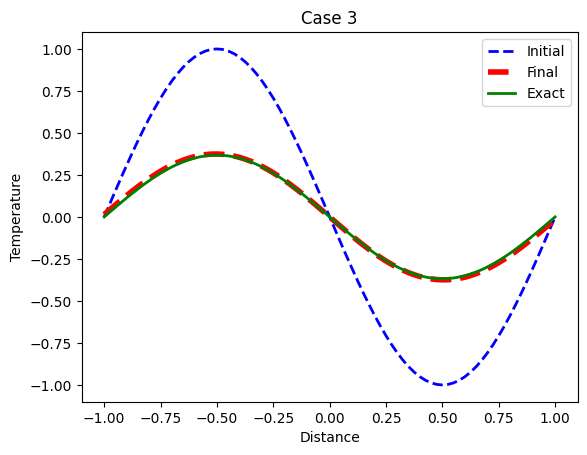

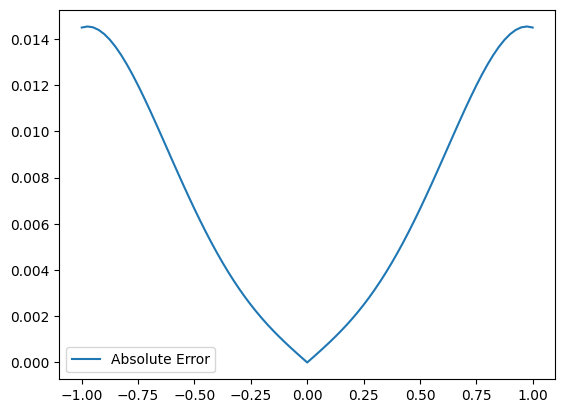

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Set numerical parameters
dt = 0.001
dx = 0.025
t_final = 1.0

# Set physical parameters
alpha = 1 / np.pi**2

# Set up grid
x = np.arange(-1, 1+dx, dx)
n = len(x)

# Define discrete wavenumbers
k = 2 * np.pi * np.fft.fftfreq(n, d=dx)

# Initial condition
u0 = -np.sin(np.pi * x)
u0hat = np.fft.fft(u0)

# Reshape u0hat to a real-imaginary vector
u0hat_ri = np.concatenate((u0hat.real, u0hat.imag))

# Define the right-hand side function for odeint
def rhsHeat(uhat_ri, t, k, alpha):
    uhat = uhat_ri[:n] + 1j * uhat_ri[n:]
    d_uhat = -alpha * k**2 * uhat
    d_uhat_ri = np.concatenate((d_uhat.real, d_uhat.imag)).astype('float64')
    return d_uhat_ri

# Call odeint to solve the problem
t = np.arange(0, t_final+dt, dt)
uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(k, alpha))

# Reshape uhat_ri to a complex vector
uhat = uhat_ri[:,:n] + 1j * uhat_ri[:,n:]

# Compute the solution in physical space using FFT
u = np.zeros_like(uhat)
for i in range(len(u)):
    u[i,:] = np.fft.ifft(uhat[i,:]).real

# Define the exact solution
u_exact = -np.sin(np.pi * x) * np.exp(-t_final)

# Plot the results
plt.figure()
plt.plot(x, u[0,:], '--b', label='Initial', linewidth=2)
plt.plot(x, u[-1,:], '--r', label='Final', linewidth=4)
plt.plot(x, u_exact, 'g', label='Exact', linewidth=2)
plt.xlabel('Distance')
plt.ylabel('Temperature')
plt.title('Case 3')
plt.legend()
plt.show()

plt.figure()
plt.plot(x, np.abs(u_exact - u[-1,:]), label='Absolute Error')
plt.legend()
plt.show()

#####In the provided code, the time step $dt$ is set to $0.01, 0.0025$ and $0.001$, and this value is used in the time integration step using $odeint$ function. It is expected that changing the value of $dt$ would affect the accuracy and the speed of the numerical solution of the heat equation.

#####However, it is possible that small changes in $dt$ might not be noticeable in the solution, especially if the time step is already small enough to resolve the dynamics of the solution accurately. In other words, the solution may have converged, and further decreasing the time step does not provide additional benefits.